In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [4]:
now

datetime.datetime(2021, 6, 2, 15, 44, 39, 167469)

In [5]:
from datetime import timedelta

In [6]:
start = datetime(2011, 1, 7)

In [7]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
import pandas as pd
import numpy as np

In [13]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [15]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [16]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [17]:
ts.resample('5min', closed='right').mean()

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [20]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range("1/1/2000",periods=2, freq='W-WED'),
                    columns=["a","b","c","d"])
frame

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


In [21]:
df_daily = frame.resample('D').asfreq() #'D'=Daily
df_daily #NaN 값 채워야됨

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


In [22]:
frame.resample('D').ffill()

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-06,1.422358,1.340852,0.064892,0.572094
2000-01-07,1.422358,1.340852,0.064892,0.572094
2000-01-08,1.422358,1.340852,0.064892,0.572094
2000-01-09,1.422358,1.340852,0.064892,0.572094
2000-01-10,1.422358,1.340852,0.064892,0.572094
2000-01-11,1.422358,1.340852,0.064892,0.572094
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


<AxesSubplot:>

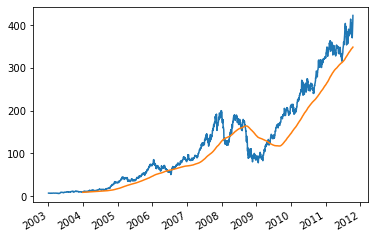

In [26]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()